S&P500 Index를 만들어보자

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
listing = pd.read_pickle("sp500_list_start_end.pickle")

In [3]:
stock = pd.read_pickle("allstock.pickle")
stock

,PERMNO,date,PRC
0,10001,2000-01-03,8.5625
1,10001,2000-01-04,8.4375
2,10001,2000-01-05,8.5625
3,10001,2000-01-06,8.5000
4,10001,2000-01-07,8.4375
...,...,...,...
42561772,93436,2022-12-23,123.1500
42561773,93436,2022-12-27,109.1000
42561774,93436,2022-12-28,112.7100
42561775,93436,2022-12-29,121.8200


In [4]:
table = pd.pivot_table(stock, 
               values="PRC",
               index="date",
               columns="PERMNO")

In [29]:
listing

,permno,start,ending
0,10107.0,1994-06-07,2022-12-30
1,10145.0,1925-12-31,2022-12-30
2,60599.0,1999-03-25,2022-12-30
3,25267.0,1957-03-01,2002-07-19
4,64282.0,1983-09-15,2022-12-30
...,...,...,...
138446,86868.0,2002-07-22,2022-12-30
138447,82651.0,2002-01-02,2022-12-30
138448,90248.0,2020-05-12,2022-12-30
138449,13035.0,2011-11-01,2022-12-30


In [28]:
listing.sort_values("permno")

,permno,start,ending
27528,10078.0,1992-08-20,2010-01-28
4994,10078.0,1992-08-20,2010-01-28
32537,10078.0,1992-08-20,2010-01-28
56778,10078.0,1992-08-20,2010-01-28
2456,10078.0,1992-08-20,2010-01-28
...,...,...,...
132905,93436.0,2020-12-21,2022-12-30
132933,93436.0,2020-12-21,2022-12-30
135438,93436.0,2020-12-21,2022-12-30
127145,93436.0,2020-12-21,2022-12-30


In [5]:
listing_pp = listing.drop_duplicates().reset_index(drop=True)

In [6]:
code = listing_pp.permno.values

table_pp = table.loc[:, code]

In [7]:
table_pp.index = pd.to_datetime(table_pp.index)

In [8]:
# 빈 데이터프레임 생성
idx = table_pp.index
col = table_pp.columns

mask = pd.DataFrame(index=idx, 
                    columns=col)

In [18]:
listing_pp.start[0] 

Timestamp('1994-06-08 00:00:00')

In [22]:
for idx, row in listing_pp.iterrows():
    mask.loc[row.start:row.ending, row.permno] = 1

<AxesSubplot:xlabel='date'>

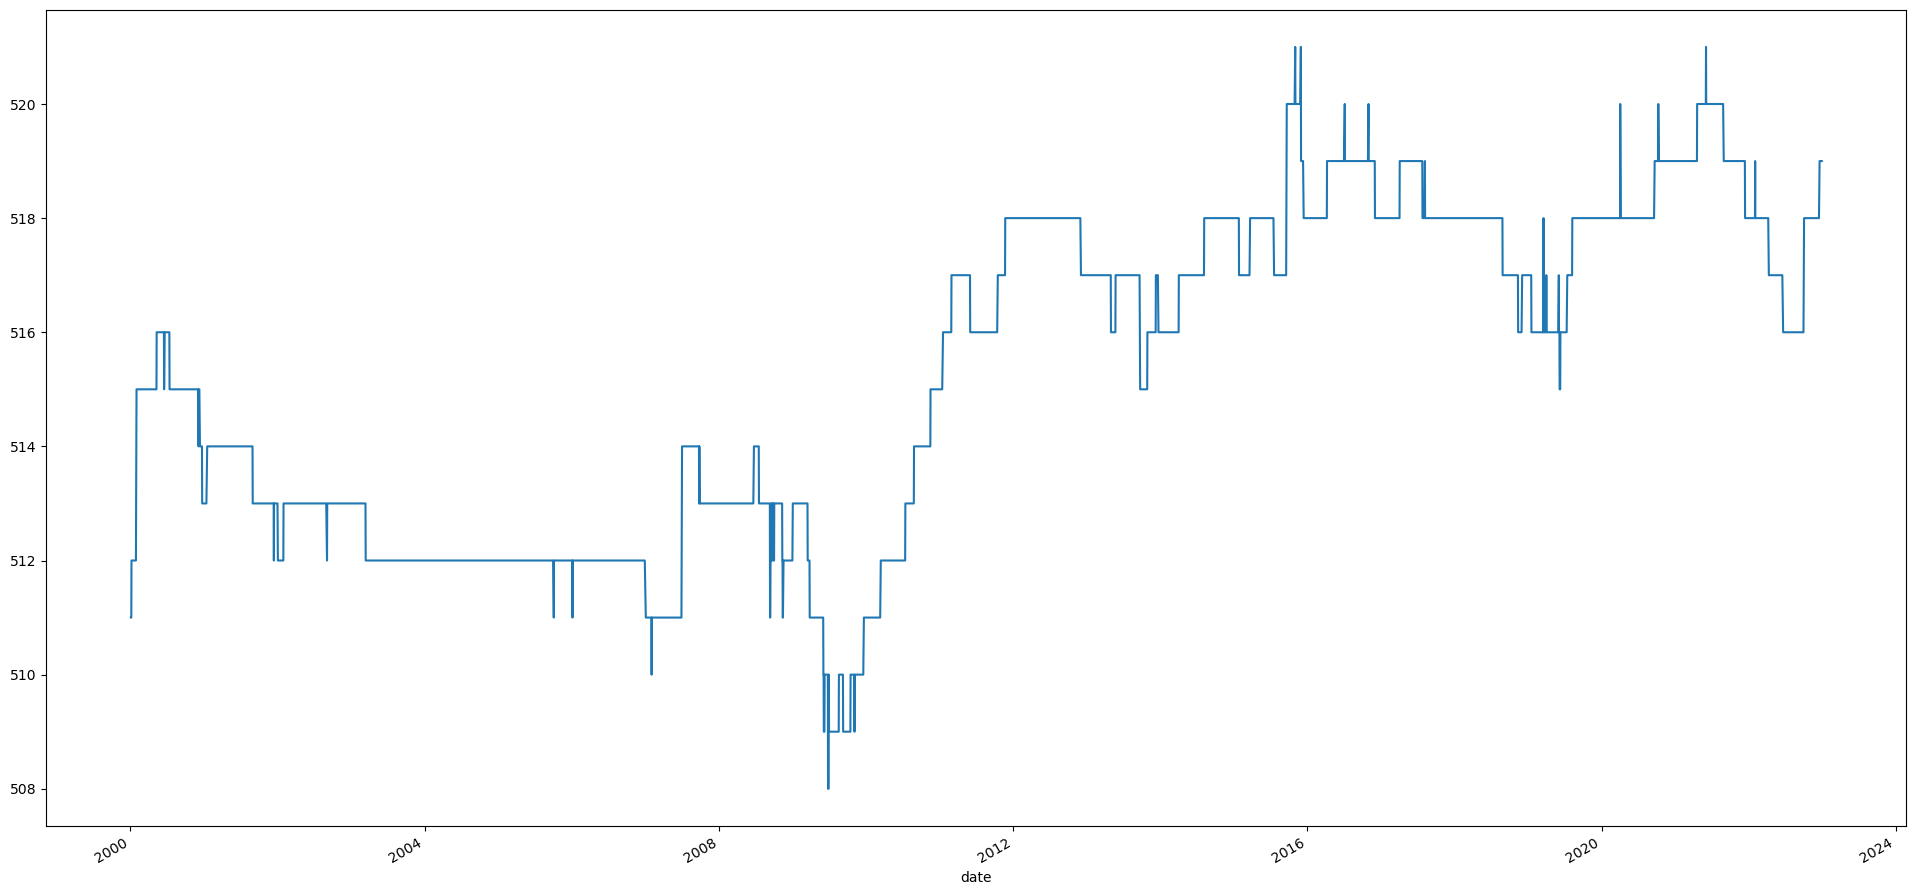

In [27]:
mask.sum(1).plot(figsize=(24,12))

In [ ]:
()